In [15]:
import matplotlib.pyplot as plt 
import cv2 
import numpy as np 

In [16]:
path_data = './data/'
img = cv2.imread(path_data + 'image.jpg')
img.shape

(466, 700, 3)

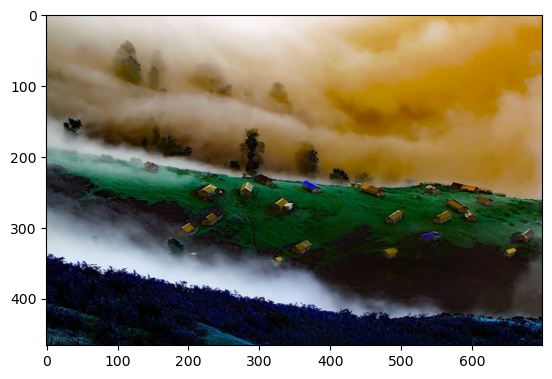

In [17]:

plt.imshow(img)

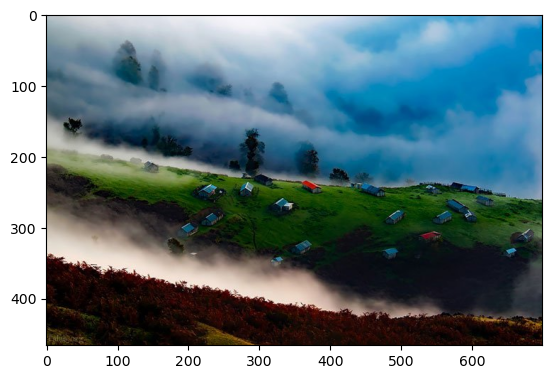

In [18]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

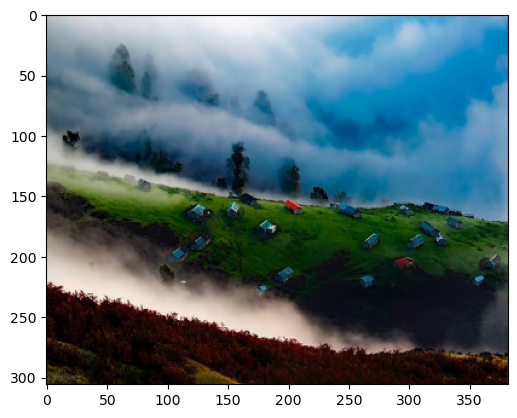

In [19]:
img = cv2.resize(img, (382, 306))
plt.imshow(img)

In [20]:
X = img.reshape((-1, 3))
X.shape

(116892, 3)

In [21]:
from sklearn.cluster import KMeans

In [22]:
k = 50
model = KMeans(n_clusters=k)
model.fit(X)

/home/mohammad/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=50)

In [23]:
colors = np.array(model.cluster_centers_, dtype='uint8')

In [24]:
print(colors)

[[ 38  79   8]
 [140 161 179]
 [ 10  16  20]
 [ 42 103 137]
 [238 222 209]
 [ 74 121 152]
 [ 48 144 197]
 [ 55  55  55]
 [134 117 107]
 [196 185 174]
 [  1 120 177]
 [107  94  85]
 [ 17  60   7]
 [191 205 218]
 [ 24   7   4]
 [ 62  92 110]
 [ 82 158 204]
 [ 30  78 104]
 [165 191 208]
 [ 20  24  29]
 [237 238 244]
 [154 146 126]
 [ 30  63  26]
 [  8  41   8]
 [ 59  95  30]
 [ 38  11   6]
 [ 78  73  67]
 [ 77 138 178]
 [ 30 122 167]
 [118 143 165]
 [ 53 127 169]
 [ 80 109 128]
 [ 11  39  55]
 [214 221 231]
 [  8   4   2]
 [221 202 188]
 [177 162 150]
 [ 89 118  54]
 [ 77  47  22]
 [106 172 210]
 [ 99 129 151]
 [109 154 191]
 [ 55  20  12]
 [  3 133 190]
 [  3  97 144]
 [ 20  58  80]
 [138 181 207]
 [125  69  34]
 [ 40  38  37]
 [129 144  91]]


In [25]:
i = 1
for color in colors:
    plt.subplot(1,k,i)
    plt.axis('off')
    i +=1
    mat =  np.zeros((100,100,3), dtype=np.uint8)
    mat[:,:,:] = color
    plt.imshow(mat)
plt.show()

### asic Segmenation based upon similar color regions
### segmation partitions an image into  regions
### have similar visual appearance corresponding tp parts objects  

In [26]:
model.labels_.shape

(116892,)

In [27]:
# newImage = np.zeros((X.shape), dtype=np.uint8)
newImage = np.array([colors[model.labels_[i]] for i in range(X.shape[0])], dtype=np.uint8)

newImage = newImage.reshape(img.shape)
newImage.shape

(306, 382, 3)

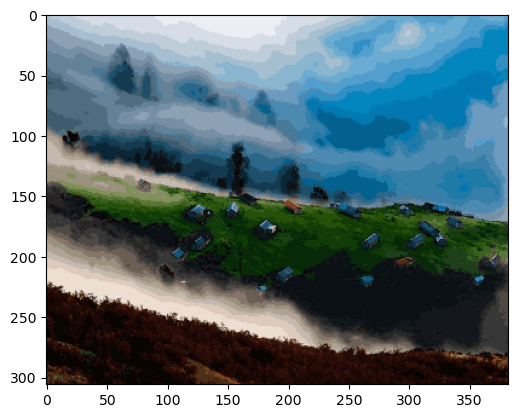

In [28]:
plt.imshow(newImage)